In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Depi\Heart_Disease_Project\data\heart_disease_clean.csv")

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("num", axis=1)
y = df["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [4]:
models = {
    'Logistic Regression': LogisticRegression(max_iter= 1000),
    'Decision Tree': DecisionTreeClassifier(random_state= 42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(probability= True, random_state=42)
}
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} trained successfully.")

Logistic Regression trained successfully.
Decision Tree trained successfully.
Random Forest trained successfully.
SVM trained successfully.


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

   
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

    # ROC-AUC for multiclass 
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)
        auc_score = roc_auc_score(y_test, y_proba, multi_class="ovr", average="weighted")
    else:
        auc_score = None

    results[name] = [accuracy, precision, recall, f1, auc_score]


results_df = pd.DataFrame(results, index=["Accuracy","Precision","Recall","F1-score","AUC"]).T
print("\nModel Performance Metrics:\n")
print(results_df)


Model Performance Metrics:

                     Accuracy  Precision    Recall  F1-score       AUC
Logistic Regression  0.606557   0.561719  0.606557  0.582123  0.830171
Decision Tree        0.459016   0.446380  0.459016  0.451170  0.607434
Random Forest        0.540984   0.436575  0.540984  0.483178  0.820539
SVM                  0.557377   0.460876  0.557377  0.504547  0.840111


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

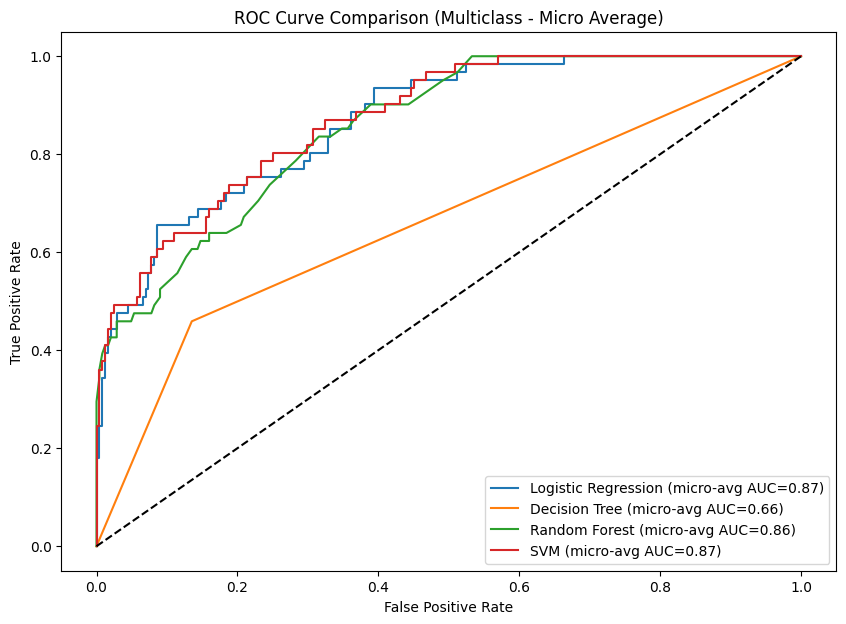

In [9]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

classes = sorted(y.unique())  # All class labels
y_test_bin = label_binarize(y_test, classes=classes)
n_classes = y_test_bin.shape[1]

plt.figure(figsize=(10,7))

for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)

        # Compute micro-average ROC
        fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (micro-avg AUC={roc_auc:.2f})")

# Plot reference line
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (Multiclass - Micro Average)")
plt.legend()
plt.show()